# **2. Programming: Dataloading, feature extraction, model training and evaluation for image classification**

### **2.1 Dataloading: reading, shuffling and pre-processing the data**

Different datasets need to be handled distinctly. Often you will need to code your custom dataloader to correctly retrieve the data and its labels following a given format. Although a number of libraries offer easier ways to load data (e.g., [sklearn](https://scikit-learn.org/0.16/datasets/index.html), [torchvision](https://pytorch.org/vision/0.8/datasets.html)), we are going to code a custom dataloading scheme based on a simple dataset of images from three classes. This pseudo-dataloder is going to read sub-folders from a root directory and create data and labels structures based on them. Our dataloading process is also going to involve the **shuffling** of the training and testing sets.  

The **train** and **test** subsets (folders) are already provided. Note that one would typically load a complete, unified dataset and randomly partition it into training, validation and testing subsets. In fact, distinct splits of a single dataset into different subsets are the basis of **cross-fold validation**. The **validation** subset helps evaluating the performance of the system while the training process takes place without influencing in its parameter's values (as the samples in the training subset are supposed to do via backpropagation). We are going to create and work with a validation subset only in the next assignment, resorting to only train and test sets on the current one.   

In [ ]:
READ_THE_INSTRUCTIONS_FLAG = True

In [ ]:
from matplotlib import pyplot as plt
from skimage import data, exposure
from google.colab import files
import sys
import cv2
import os
import numpy as np

print('-'*40)
print ('Python version: {}'.format(sys.version))
print('OpenCV version: {}'.format(cv2.__version__))

if not READ_THE_INSTRUCTIONS_FLAG:
  raise Exception('Please go back and read the instructions.')
else:
  print('\nThank you for reading the instructions.')
print('-'*40)

----------------------------------------
Python version: 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
OpenCV version: 4.1.2

Thank you for reading the instructions.
----------------------------------------


In [ ]:
# The activities described in this cell are worth a maximum of 10 points. 

# TO-DO: create the function "read_data", which reads all .jpg images from the subfolders of a given 
# path (i.e., root folder). Follow the template provided. 

def read_data(address, resize_dim = (64,64)): # the default resizing dimensions are 64 x 64 pixels

    # This function reads all images from a folder (whose address is given by input "address")
    # and its subfolders, and creates labels based on the subfolder names. Consider the 
    # following illustrative directory structure from a root folder called "train" or "test"
    # with subfolders named "class1" and "class2" (two classes):
    #
    # +-- train
    #     +-- class1
    #     +-- class2
    # +-- test
    #     +-- class1
    #     +-- class2
    #
    # In this example, we want the function to, given the path to "train" (or "test"),
    # visit sub-folders "class1" and "class2" and store all of their images into a single ndarray.
    # While doing that, the function must also create a "labels" ndarray specifying the  
    # class each sample belongs to.   

    # 0. Grab folders/sub-folders addresses and number of classes (i.e., # of subfolders)
    # tip: use os.walk
    folders = address                           # TO-DO # structure with folders and subfolders
    subfolderNames = next(os.walk(folders, topdown=True))[1]  # TO-DO # subfolders names.
    n_classes = len(subfolderNames)             # TO-DO # number of subfolder = number of classes.
    
    # 1. Create empty lists named "data" and "labels". Create an empty dictionary named
    # "classes_labels". 
    # Dictionaries are convenient data structures offered in Python to create
    # key-value pairs. The "classes_labels" dictionary will specify the index-to-class
    # correspondence. E.g., classes_labels['0'] = "beaver", classes_labels['1'] = "moose", etc. 
    data = [] # TO-DO
    labels = [] # TO-DO
    classes_labels = {} # TO-DO (create an initially EMPTY dictionary)

    # 2. Create a loop that does the following: 
    #   2.1. Visits each sub-folder of the path provided and,
    #   2.2. For each new subfolder, creates a key/value pair in the "classes_labels"
    #     dictionary (see example above).
    #   2.3  Reads an individual .jpg image file using the cv2 library.
    #   2.4  Resizes the image using the dimensions specified by the "resize_dim"
    #     input. 
    #   2.3. Adds each resized image to an individual index of the "data" list
    #     (all images are added to the same "data" list)
    #   2.4. For each new file read, add the corresponding label to the "labels"
    #     list. E.g., consider two data folders (two classes) with 5 and 10 samples,
    #     respectively. The "labels" list would have the following values (in each position): 
    #     000001111111111
    
    for i in range(n_classes): # for each subfolder,

        # classes_labels = #TO-DO # create an 
        # entry in the dictionary for the new class.
        classes_labels[i] = subfolderNames[i]

        # for each image in a subfolder:
        for _, _, files in os.walk(folders + subfolderNames[i]): 
            for file in files:

              # add a label for this class in the labels list
              labels.append(i)

              # read the image
              img = cv2.imread(folders + subfolderNames[i] + '/' + file)
              
              # resize the image and change BGR to RGB (for matplotlib plotting purposes)
              img = cv2.resize(img, resize_dim, interpolation=cv2.INTER_CUBIC)
              img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

              # add this image to the "data" list
              data.append(img)

    # 3. Convert the "data" and "labels" lists into numpy ndarrays.
    data = np.asarray(data) # TO-DO # convert data into NxHxWxC, where N = # of samples, H=height, W=width, C = color channels
    labels = np.asarray(labels) # TO-DO # convert labels list into np ndarray

    # 4. Return the "data" and "labels" ndarrays, as well as the "classes_labels" dictionary.
    return data, labels, classes_labels 

In [ ]:
# The activities described in this cell are worth a maximum of 5 points.

# TO-DO: check if the "./data/train" or "./data/test" folders already exist in your 
# colab repository. If they don't, ask the user to upload a file called "data.zip"
# and unzip it. This file posses the aforementioned folders.
# note: use the "data.zip" file provided in your assignment description. It has 
# ~35MB. Allow some minutes for it to be uploaded to your colab repository. If
# the colab session is disconnected, you will need to upload the .zip file again.
if os.path.isfile('data.zip'):
  print('File data.zip is already uploaded.')
else:
  print('Please upload data.zip')
  files.upload()

# TO-DO: check if "./data/train" and "./data/test" exist. If not, ask user to upload 
# "data.zip" and unzip it. This file will have the aforementioned sub-folders.
if os.path.isdir('./data/train') and os.path.isdir('./data/test'):
  print('Folders "./data/train" and "./data/test" exist.')
else:
  !unzip data.zip
  print('Created folders.')

train_folders = "./data/train/"
test_folders = "./data/test/"
resize_dims = (64, 64) # determines the target resizing dimensions.

# TO-DO: use your "read_data" function to read the train and test folders/files. You might 
# need to call this function twice (once for the train folder, once for the test folder).   
train_data, train_labels, classes_labels = read_data(train_folders, resize_dims) # TO-DO
test_data, test_labels, classes_labels_test = read_data(test_folders, resize_dims) # TO-DO 

# assertion to guarantee that the train and test classes are the same based on the subfolders' names.
assert classes_labels==classes_labels_test, 'Your train/test folder names do not match'

# TO-DO: print the shape of the train and test ndarrays. If correctly loaded, the dimensions 
# of the two data lists should be (253, 64, 64, 3) for train, and (54, 64, 64, 3) for test. 
print(train_data.shape)
print(test_data.shape)

File data.zip is already uploaded.
Folders "./data/train" and "./data/test" exist.
(254, 64, 64, 3)
(54, 64, 64, 3)



Shuffling train data


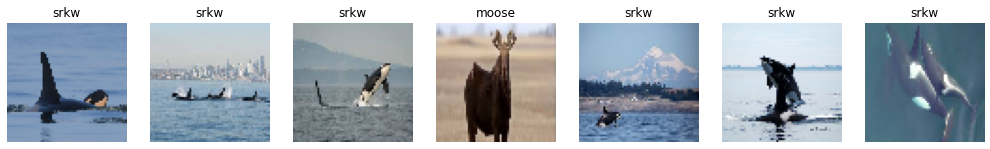


Shuffling test data


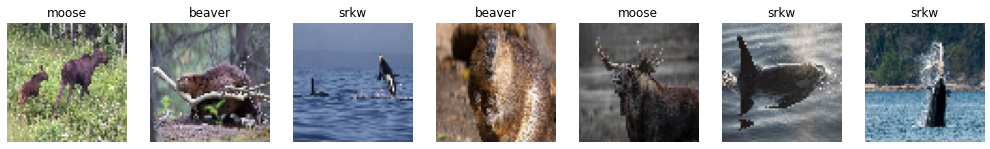

In [ ]:
# The activities described in this cell are worth a maximum of 10 points.

# TO-DO: create the function "randomize_and_display", which randomizes the train or test datasets,
# and display some samples with their associated labels to check its results. Follow the template provided. 

def randomize_and_display(data, labels, classes_labels, display_n=5, phase=None):

  # data: dataset (e.g., test or train data lists)
  # labels: list of labels for your dataset
  # classes: dictionary that specifies the correspondence of classes and labels
    # (see the template of function "read_data" for details)
  # display_n: number of randomized samples to display (default: 5)
  # phase: either train or test (for debugging purposes)
  
    # 0. Print the type of data being shuffled (either "train" or "test").
    if phase is not None:
      print("\nShuffling {} data".format(phase))

    # 1. shuffle both the data and its equivalent labels in the same way  
    # (So that the label/data correspondence is maintained).
    # if using a shuffling algorithmn, use "10" as a seed (for consistency of
    # results). tip: sklearn's "shuffle" function.
    from sklearn.utils import shuffle
    
    data_shuff, labels_shuff = shuffle(data, random_state=10), shuffle(labels, random_state=10) # TO-DO

    # 2. create a plot showing the first "display_n" number of images from the shuffled
    # train or test sets. The title of each image should display its corresponding
    # label (using the "labels" and "classes_labels" inputs). You should see samples
    # of all three classes even if choosing a relatively small subset (e.g., display_n>=4). 
    # Hide the axis of the plot for visibility. An example of how your 
    # plot should look like after calling the function twice (once for train, once for test data) is provided at:
    # https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A3/shuffled_data.jpg  
    
    fig= plt.figure(figsize = (display_n*2.5,display_n*2.5)) #TO-DO # create the figure element
    for i in range(display_n): 
      # add an image to the figure element to be displayed
      # with the correct title on top of it (see example above)
      plt.subplot(2, display_n, i+1)
      plt.title(classes_labels[labels_shuff[i]])
      plt.imshow(data_shuff[i]) # convert image from BGR to RGB
      plt.axis("off")
    plt.show()

    # 3. return the shuffled data and labels
    return data_shuff, labels_shuff

# TO-DO: use your "randomize_and_display" function to shuffle your train and test subsets, as
# well as their corresponding labels.
# Note: a "display_n" number of images should be displayed to guarantee that the shuffling was correctly completed.
# Again, an example of how your plots should look like after calling the function twice is provided at:
# https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A3/shuffled_data.jpg

train_data, train_labels = randomize_and_display(train_data, train_labels, classes_labels, display_n=7, phase="train") # TO-DO # use randomize_and_display on the train data
test_data, test_labels = randomize_and_display(test_data, test_labels, classes_labels, display_n=7, phase="test") # TO-DO # use randomize_and_display on the test data

### **2.2 Feature extraction: HOG, Hue Histogram and Raw RGB**

Now that your train and test data are correctly loaded and pre-processed, you need to extract meaningful visual features from them. These features are going to drive machine lenarning-based image classifications tasks. Since such classifiers are trained and tested based on the features extracted, their design and quality (i.e., how well they represent/generalize the data) are paramount in the performance of the system.

In this assignment we are going to work with three generic features (i.e., not specific to a certain target class) and analyze the classification performance based solely on each of them. Note that recent deep learning-based approaches also calculate similar features, but mostly using convolutional kernels in an efficient [1] manner.

[1] Krizhevsky A, Sutskever I, Hinton GE. Imagenet classification with deep convolutional neural networks. Communications of the ACM. 2017 May 24;60(6):84-90.

In [ ]:
# The activities described in this cell are worth a maximum of 10 points.

from skimage.feature import hog

# 2.2.1. Histogram of Oriented Gradients

# TO-DO (x points): create a function ("my_hog_batch") that receives an N x H x W x C numpy ndarray 
# of data and calculates, for each image, a row vector representing its HOG. 
# The final output matrix represents the HOG features of all images in the input dataset
# put together (i.e., a row—HOG—per image).

def my_hog_batch(data, phase = None):
  
  # 0. Grab the features of a single sample to determine the shape of the HOG row vector
  # You do not need to implement the HOG algorithm again. A tip is to use skimage's "hog" function.
  # use the following parameters: 9-bin HOGs, cells of 8 x 8 pixels, blocks of 3 x 3 cells. 

  template = hog(data[0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3)) # TO-DO # Calculates the HOG features of a single sample
  hog_size = template.shape[0] # TO-DO # Grabs the dimensions of the template just calculated

  # 1. Print what type of data is being processed (for debugging purposes)
  if phase is not None:
      print("Extracting HOG features from the {} dataset...".format(phase))
  else:
      print("Extracting HOG features...")

  # 2. Pre-allocate with zeros a numpy ndarray of dimensions N (samples) x hog_size to receive the HOG features
  hog_features = np.zeros( [len(data), hog_size] ) # TO-DO # pre-allocate with zeros

  # 3. loop through each sample in the dataset
  for i in range (data.shape[0]):
    
      # 4. grab a single sample and turn it to grayscale
      current = cv2.cvtColor(data[i], cv2.COLOR_RGB2GRAY) # TO-DO
      
      # 5. calculate the HOG features for the grayscale sample. Again, use the following parameters:
      # orientation bins: 9, cell size: 8x8 pixels, blocks: 3x3 cells
      # Each row of your "hog_features" is going to hold the flattened (i.e., row vector) 
      # output of this function. 
      # tip: use skimage's "hog" function
      current = hog(data[i], orientations=9, pixels_per_cell=(8,8), cells_per_block=(3, 3))

      # TO-DO: update the value of "hog_features" with a new row (i.e., HOG of a new image)
      hog_features[i] = current
      
  return hog_features

# TO-DO: use the "my_hog_batch" function to extract the HOG features from both 
# train and test datasets.
# Save your HOG train and test features in a dictionary named
# "features" under keys "HOG_train" and "HOG_test".
features = {}

#TO-DO: create the "HOG_train" and "HOG_test" keys and add the output of your 
# "my_hog_batch" function to them. 
features['HOG_train'] = my_hog_batch(train_data, phase='train')
features['HOG_test'] = my_hog_batch(test_data, phase='test')

# assertions to make sure that the dimensions of your HOG features matrices are correct
assert (features['HOG_test'].shape[0]==test_data.shape[0]) and (features['HOG_train'].shape[0]==train_data.shape[0]), 'Dimensions of HOG features matrix wrong.'

Extracting HOG features from the train dataset...
Extracting HOG features from the test dataset...


In [ ]:
# The activities described in this cell are worth a maximum of 5 points.

# 2.2.2. Hue Histogram 

# TO-DO (x points): create a function that receives an N x H x W x C numpy ndarray 
# of data and calculates, for each image, a row vector representing a histogram of 
# hue values. 
# The final output matrix represents, in each row, the hue histogram of one single
# image from the input dataset.

def my_hhist_batch(input, n_bins, phase = None):   
  
  # 0. Print what type of data is being processed (for debugging purposes).
  if phase is not None:
      print("Extracting h histogram features from the {} dataset...".format(phase))
  else:
      print("Extracting h histogram...")

  # 1. pre-allocate two matrices: 
  # 1) the matrix of HSV images to be converted from the input data matrix; 
  # 2) the matrix of histograms to be calculated from the hue channel of each image
  hsv = np.zeros(input.shape) # TO-DO # pre-allocate with zeros
  h_hist = np.zeros([input.shape[0], n_bins]) # TO-DO # pre-allocate with histograms with 
  # zeros (use n_bins to determine the number of bins of these histograms). 
  # recall: one histogram per image

  # 2. loop through each sample in the dataset
  for i in range(input.shape[0]):

      # 3. Convert the current RGB image to HSV
      current = cv2.cvtColor(input[i], cv2.COLOR_RGB2HSV) #TO-DO

      # 4. Calculate the Hue histogram of the HSV version of the current image and 
      # save it as a row of your "h_hist" matrix (i.e., consider only the first 
      # channel of the HSV image). Limit the histogram to the [0,1] range. 
      # The number of bins is determined by the "n_bins" input hyper parameter. 
      # Note: you only need to store the values of each bin (rather than the 
      # values and bin edges). For example: for 10-bin histograms, each HSV image will 
      # result in a 1x10 row vector output.  
      # tip: you can use numpy's histogram-calculating function.
      
      # channels: 0 = hue, 1 = saturation, 2 = value
      hsv[i] = current
      hue = hsv[i][:, :, 0]

      # calculate histogram of hue
      hist, bins = np.histogram(hue, bins=n_bins)
      
      # Make sure that the values in the histogram sum to 1 (i.e., apply normalization)
      norm = hist / np.sum(hist)

      #TO-DO: update the value of h_hist
      h_hist[i] = norm

  # return the output matrix
  return h_hist

# TO-DO: use your "my_hhist_batch" function to extract the Hue Histogram features
# from both train and test datasets. Create 16-bin histograms. 
# these features should be saved on your "features" dictionary under keys 
# "HHist_train" and "HHist_test"
n_bins = 16 
#TO-DO: create the "HHist_train" and "HHist_test" keys and add the output of your 
# "my_hhist_batch" function to them. 

features['HHist_train'] = my_hhist_batch(train_data, n_bins, phase='train')
features['HHist_test'] = my_hhist_batch(test_data, n_bins, phase='test')

# assertions to make sure that the dimensions of your features are correct
assert (features['HHist_train'].shape[0]==train_data.shape[0]) and (features['HHist_test'].shape[0]==test_data.shape[0]), 'Dimensions of HHist features matrix wrong.'
assert (features['HHist_train'].shape[1]==features['HHist_test'].shape[1]==n_bins), 'Dimensions of HHist features matrix wrong.'

Extracting h histogram features from the train dataset...
Extracting h histogram features from the test dataset...


In [ ]:
# The activities described in this cell are worth a maximum of 5 points.

# 2.2.3. Raw RGB features 

# TO-DO (x points): as a last set of visual features, simply flatten (i.e., turn into a 
# row vector) all pixel intensities found on the images of the datasets.
# each image is going to be presented as a single row in this feature matrix.
# Cast the intensity values as floats for further manipulations. 
# tip: for N color images of dimensions H x W, your raw RGB values 
# matrix should be of dimensions N,(HxWx3)
# these raw features should be saved on your "features" dictionary under keys 
# "raw_train" and "raw_test"

features['raw_train'] = np.array([train_data[i].flatten() for i in range(0, train_data.shape[0])])
features['raw_test'] = np.array([test_data[i].flatten() for i in range(0, test_data.shape[0])])

# assertion to make sure that the dimensions of one of the matrices are correct
assert(features['raw_train'].shape[1]==(train_data.shape[1]*train_data.shape[2]*train_data.shape[3])),'Wrong RGB raw values matrix dimensions'

### **2.3 Creating and training the classifiers**

We are going to test the efficacy of three classifiers using our feature matrices: 
- Support Vector Machine (SVM)
- Logistic Regresion (also know as maximum-entropy classification, log-linear classifier)
- Gaussian Naive Bayes
 
Easy-to-use implementation of these models are made available by the scikit-learn module. 

Note that we are working with a **classification** task: the independent variables (i.e., features) are going to determine the probability that a discrete value (class) happens. In the end, the dependent variable (output) can only assume a fixed number of values—the classes of the training data (for our datasets of three classes: SRKW, beaver and moose, "3"). Another common machine learning-based task is **regression**, where the independent variables result in a *continuous* value for the dependent variable (output). A common supervised machine learning algorithm used in such cases is the **linear regression**, where a line is fit to the data to map the values from the features to the predicted, continuous output. 

In [ ]:
# The activities described in this cell are worth a maximum of 15 points.

# TO-DO: import the necessary modules from sklearn to create the three
# models (svm, naive bayes and linear regression).
# import 
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

# TO-DO: create a function ("my_model_trainer") that receives a feature vector
# and corresponding labels, trains and returns a model specified by the user.
# Follow the template provided. 

def my_model_trainer(features, labels, model='nb'):

  # features: matrix of features previously calculated
  # labels: labels of the data
  # model: model to be created. must be have of three possible values:
  # "gauss_nb" (default), "lreg" or "svm" 
  
  # 1. Based on the user choice ("model"), create one of 
  # Gaussian Naive Bayes, Logistic Regression or Support Vector
  # Machine models. 

  # Note: for SVM, use "svm.SVC" with gamma='auto', linear kernel, and 
  # one-vs-rest multiclass decision function.

  # example of a model:
  if model=='nb':
    # 1.1 use scikit-learn to declare a GaussianNB model
    print('Creating a Gaussian Naive Bayes Model...')
    model = GaussianNB() #TO-DO
  
  # TO-DO: create the conditionals for the other two models
  if model=='lreg':
    print('Creating a Logistic Regression Model...')
    model = LinearRegression()

  if model=='svm':
    print('Creating a Support Vector Machine Model...')
    model = svm.SVC(gamma='auto', kernel='linear', decision_function_shape='ovr')
      
  # 2. train the model using the feature vector matrices and labels provided
  # as inputs
  # tip: use the "fit" function from sklearn
  model.fit(features, labels)  
  
  print('Finished training the model.')

  # 3. return the model created and trained 
  return model

# TO-DO: create all nine possible models by simply changing the input parameters of your
# "my_model_trainer" function.
# i.e., model 1: svm using HOG, model 2: svm using H Hist, ... , model 9: logistic regression
# using raw pixel intensities. 

# You must store each model as a key/value pair in a dictionary called "models".
# Instead of mannualy calling your "my_model_trainer" nine times, you are asked 
# to use loops (for a maximum of NINE iterations) to populate this dictionary.

# The keys of the "models" dictionary should be a combination of ["svm","nb","lreg"] and 
# ["HOG","HHist","raw"]. 
# e.g., "svm_HOG", "lreg_raw", ... (9 possibilities)

models = {}
model_type = ['svm', 'nb', 'lreg'] #TO-DO (list with three strings specifying the possible model names)
feature_type = ['HOG', 'HHist', 'raw'] #TO-DO (list with three strings specifying the possible feature types)

# TO-DO: a loop (of a maximum of nine iterations) that creates nine models and place each of 
# them in a key/value pair of the "models" dictionary.
i = 1
for m in model_type:
    for f in feature_type:
        print(i,':',m+'_'+f)
        models[m+'_'+f] = my_model_trainer(features[f+'_train'], train_labels, model=m)
        i += 1
        print()

# Note: you can ignore the warnings if some of your Logistic Regression models fail to converge 
# (e.g., "extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG, TOTAL NO. of ITERATIONS REACHED LIMIT")

1 : svm_HOG
Creating a Support Vector Machine Model...
Finished training the model.

2 : svm_HHist
Creating a Support Vector Machine Model...
Finished training the model.

3 : svm_raw
Creating a Support Vector Machine Model...
Finished training the model.

4 : nb_HOG
Creating a Gaussian Naive Bayes Model...
Finished training the model.

5 : nb_HHist
Creating a Gaussian Naive Bayes Model...
Finished training the model.

6 : nb_raw
Creating a Gaussian Naive Bayes Model...
Finished training the model.

7 : lreg_HOG
Creating a Logistic Regression Model...
Finished training the model.

8 : lreg_HHist
Creating a Logistic Regression Model...
Finished training the model.

9 : lreg_raw
Creating a Logistic Regression Model...
Finished training the model.



### **2.4 Evaluating the classifiers**

We will now create a function to calculate a number of metrics that will help evaluating the different pairs of classifier/features. The performance metrics this function calculates are: 
- Class-specific recall
- Class-specific precision
- Average recall
- Average precision
- Average F1-Score
- Average Accuracy

The auxiliary tool we are going to use to visulize the results and calculate performance metrics is the **confusion matrix**. 
Recall that a confusion matrix summarizes the predictions of a model while specifying if they were correct or not. The values of such matrix can be used to infer the number of True Positives (TP), True Negatives (TN), False Positives (FP) and False Negatives (FN), as discussed in Lecture 12.

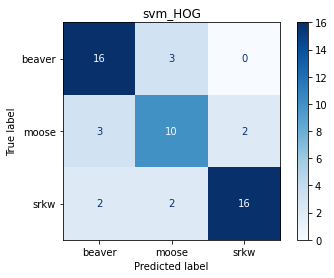

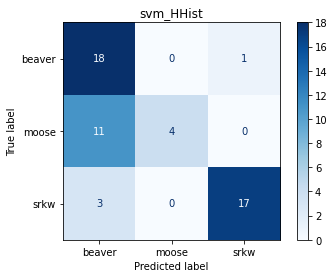

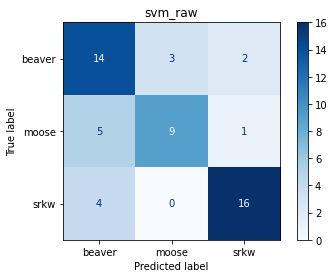

In [ ]:
# The activities described in this cell are worth a maximum of 3 points.

from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# TO-DO: as a first analysis step, consider the SVM classifier models trained with
# the three feature types (HOG, HHist and Raw). Use sklearn's "plot_confusion_matrix" and 
# "confusion matrix" to show the confusion matrix (non-normalized) using these three SVM models.
# In other words, calculate and display three confusion matrices using the SVM classifier and the HOG, 
# HHist and raw TEST (not TRAIN) features/labels.
# An example of one such confusion matrix is provided: 
# https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A3/example_cm_svm_raw_feat.jpg
  
# Note: in total, you are asked to present THREE confusion matrices. Each of them will reflect 54 predictions (number of 
# samples in the TEST set).

plot_confusion_matrix(models['svm_HOG'], features['HOG_test'], test_labels, display_labels=classes_labels.values(), cmap=plt.cm.Blues)
plt.title('svm_HOG')
plt.show()

plot_confusion_matrix(models['svm_HHist'], features['HHist_test'], test_labels, display_labels=classes_labels.values(), cmap=plt.cm.Blues)
plt.title('svm_HHist')
plt.show()

plot_confusion_matrix(models['svm_raw'], features['raw_test'], test_labels, display_labels=classes_labels.values(), cmap=plt.cm.Blues)
plt.title('svm_raw')
plt.show()

In [ ]:
# The activities described in this cell are worth a maximum of 10 points.

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

# TO-DO: create a function called "my_evaluation" to systematically calculate 
# a model's confusion matrix and a number of evaluation metrics based on it. Follow
# the template provided below.  

def my_evaluation(features, labels, model):

    # This function receives as inputs the TEST SET features, TEST SET labels and 
    # the model (trained on the TRAIN SET) to be evaluated. 
  
    # Note: you CANNOT use "sklearn.metrics" methods in this function. The goal is that you
    # calculate them manually from a confusion matrix.

    # TO-DO: create a dictionary called "results" to hold six metrics.
    # The keys of such dictionary should be "accuracy", "recall",
    # "precision", "avg_recall", "avg_precision" and "fscore".
    # The initial values of such key/value pair should be set to zero. 

    results = {} # TO-DO

    results['accuracy'] = 0
    results['recall'] = 0
    results['precision'] = 0
    results['avg_recall'] = 0
    results['avg_precision'] = 0
    results['fscore'] = 0

    # TO-DO: use the features and model provided as input parameters to make the
    # classification predictions.
    pred = model.predict(features).astype(int) # TO-DO

    # TO-DO: create a confusion matrix based on the "labels" and "pred".
    # hint: you may use sklearn.metrics.confusion_matrix to create this matrix.
    # note: if using sklearn, note that it creates a confusion matrix where the
    # y-axis represents the LABELS, while the x-axis represents
    # the PREDICTIONS (conversely to what we did in class).
    # e.g.,
    # Consider labels = [2, 0, 2, 2, 0, 1], pred = [0, 0, 2, 2, 0, 2].
    # The confusion matrix (CM) would be: array([[2, 0, 0], [0, 0, 1], [1, 0, 2]])
    # And the normalized CM would be: [[1, 0, 0], [0, 0, 1], [0.33, 0, 0.66]]

    cm_raw = confusion_matrix(pred, labels) # TO-DO # calculate the raw (non-normalized) CM
 
    # TO-DO: calculate the number of True Positives, False Negatives, 
    # and False Positives based on your confusion matrix (refer to the
    # slides for Lecture 12). 
    # tip: consider these metrics as class-specific. Thus for N classes, each metric
    # will be a row vector of dimensions 1,N. The "average" metrics will consider 
    # all classes at once. 

    n = cm_raw.shape[0]

    TP = np.zeros(n) # TO-DO
    FP = np.zeros(n) # TO-DO
    FN = np.zeros(n) # TO-DO

    for i in range(n):
        TP[i] = cm_raw[i,i]
        FP[i] = np.sum(cm_raw[i,:]) - cm_raw[i,i]
        FN[i] = np.sum(cm_raw[:,i]) - cm_raw[i,i]

    # TO-DO: calculate the class-specific and average recall. insert
    # each value in its corresponding key on the dictionary previously created
    # tip: consider scenarios where a division by zero (i.e., NaN results)
    # can happen. You might want to add very small values on denominators to
    # avoid that.
    
    for i in range(n):
        results['recall'] += TP[i] / (TP[i] + FN[i] + 0.00000000000000001)

    # update the values of keys "recall" and "avg_recall" from the "results" dictionary
    results['avg_recall'] = results['recall'] / n

    # TO-DO: calculate the class-specific and average precisions. insert
    # each value in its corresponding key on the dictionary previously created.
    # tip: consider scenarios where a division by zero (i.e., NaN results)
    # can happen. You might want to add very small values on denominators to
    # avoid that.

    for i in range(n):
        results['precision'] += TP[i] / (TP[i] + FP[i] + 0.00000000000000001)

    # update the values of keys "precision" and "avg_precision" from the "results" dictionary
    results['avg_precision'] = results['precision'] / n

    # TO-DO: calculate the F1-Score and add it to its corresponding key in your
    # "results" dictionary
    results['fscore'] = 2 * ( (results['avg_precision'] * results['avg_recall']) / (results['avg_precision'] + results['avg_recall']) )
    
    # TO-DO: calculate the accuracy and add it to its corresponding key in your
    # "results" dictionary. 
    # Note: even without the TN element you can calculate the accuracy. Simply 
    # check the mean of "pred==labels"    
    results["accuracy"] = np.mean(pred == labels)

    # # provided checks to make sure that the manually calculated metrics are correct.
    check1 = np.isclose(results['avg_recall'], recall_score(labels, pred, average='macro', zero_division=0))
    check2 = np.isclose(results['avg_precision'], precision_score(labels, pred, average='macro', zero_division=0))
    check3 = np.isclose(results['accuracy'], accuracy_score(labels, pred, normalize=True))

    assert (check1 and check2 and check3), 'accuracy, precision or recall are not correct.'

    # TO-DO: return your evaluation metrics 
    return results

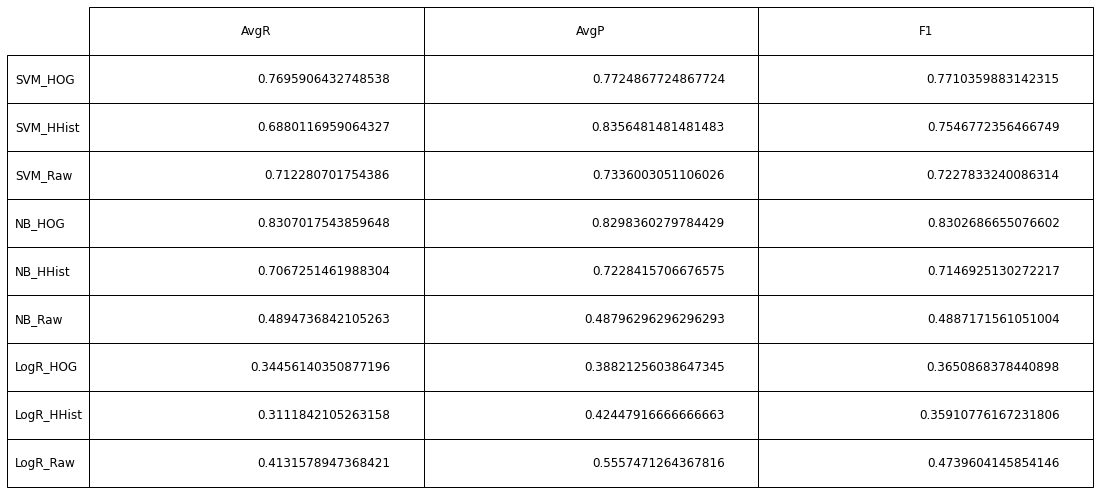

In [ ]:
# The activities described in this cell are worth a maximum of 7 points.

# TO-DO: create a dictionary called "results" and save, on each 
# key/value pair, the results of the evaluation from each of the 
# nine models trained. To focus our analisys, you only need to 
# record the average precision, average recall and F1-score in this dictionary. 
# Use loops to fill in the dictionary using a maximum of NINE iterations.

data = np.zeros((9,3)) # only three metrics and nine possible models 
results = {}
idx = 0

# TO-DO: loop throughout each model and feature type (total of nine iterations). 
# For each model/feature index,
# 1) Use your "my_evaluation" function to calculate the performance metrics. Save the 
# result on the "results" dictionary with the following key name template: "results[m+"_"+f+"_eval"]"
# where "m" is the name of the model, and "f" is the type of the feature.   
# e.g., For SVM using HOG, the performance metrics would be saved on "results[svm_HOG_eval]".
# 2) fill data[idx,0], data[idx,1] and data[idx,2] with the values of "avg_recall", "avg_precision" and 
# "fscore" for this model/features pair.

for m in model_type:
    for f in feature_type:
        results[m+"_"+f+"_eval"] = my_evaluation(features[f+'_test'], test_labels, models[m+'_'+f])
        data[idx, 0] = results[m+"_"+f+"_eval"]['avg_recall']
        data[idx, 1] = results[m+"_"+f+"_eval"]['avg_precision']
        data[idx, 2] = results[m+"_"+f+"_eval"]['fscore']
        idx += 1

# TO-DO: show the average precision, average recall and F1-score metrics of each 
# of the nine model/feature pairs in a single table. 
# The row and column labels are provided below. 
# Tip: you can use plt.table
# as a reference, your table should look [like this](https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A3/example_matrix.jpg):

row_labels = ['SVM_HOG','SVM_HHist','SVM_Raw','NB_HOG','NB_HHist','NB_Raw','LogR_HOG','LogR_HHist','LogR_Raw']
col_labels = ["AvgR", "AvgP", "F1"]

table = plt.table(cellText=data, rowLabels=row_labels, colLabels=col_labels, loc='center')
table.set_fontsize(12)
table.scale(3,4)
_= plt.axis('off')

### **2.5 Increasing the classification performance**

There exists a number of design choices to make when curating a dataset and training a model. These include, but are not limited to: 

- Size of the input images (if the data is resized)
- Data standardization: turn the data (either raw of feature-like) into a zero-mean, unit variance set
- Data augmentation: modify the input data to train the models using more generic and representative data
- Solvers: supervised machine learning algorithms use specific techniques to carry out their optimization problems. Changing these techniques influences in the models' performance.   

The "sklearn" library provides functions to easily implement these pre-processing and training mechanisms. Note that different combinations of them might **improve or decrease** the performance of the models  

You are asked to test different layouts and use the evaluation pipeline created up until sub-section 2.4 to analyze each of them. **Your goal is to reach a layout that surpasses 0.84 of F1-score using any combination of the aforementioned modifications in the training/testing phases**. 

Note: You cannot use other classification models (e.g., Convolutional Neural Networks-based image classifiers). 

In [ ]:
# The activities described in this cell are worth a maximum of 10 points.

# TO-DO: insert here the layout configuration that reached >0.85 of F1-score in
# test set provided. Do not use models other than SVM, Log. Regression
# and Gauss. Naive Bayes. 

# After conducting my analysis, changing resize_dims from (64,64) to a greater value
# of (100,100) gives me an F1-score > 0.85 when using Gauss. Naive Bayes and HOG.

resize_dims = (100, 100)

# re-read images with above dimensions
train_data, train_labels, classes_labels = read_data(train_folders, resize_dims)
test_data, test_labels, classes_labels_test = read_data(test_folders, resize_dims)

# re-calculate features 
features['HOG_train'] = my_hog_batch(train_data, phase='train')
features['HOG_test'] = my_hog_batch(test_data, phase='test')

# re-train model
models['nb_HOG'] = my_model_trainer(features['HOG_train'], train_labels, model='nb')

# re-evaluate fscore
fscore = my_evaluation(features['HOG_test'], test_labels, models['nb_HOG'])['fscore']

assert fscore < 0.85, 'fscore is less than 0.85'

print('F1-score using nb_HOG: ', fscore)
# output: F1-score using nb_HOG:  0.8497813970381416

Extracting HOG features from the train dataset...
Extracting HOG features from the test dataset...
Creating a Gaussian Naive Bayes Model...
Finished training the model.
F1-score using nb_HOG:  0.8497813970381416


### **2.6 Custom dataset**

Time to create and use your own dataset! Download images and divide them into train/test subfolders following the sample data provided. You can also use a subset of a pre-existing dataset. 

Requirements are: 
- 3+ classes
- 70+ training images per class (.jpg files)
- 10+ testing images per class (.jpg files)
- Up to 50MB for the .zip file of your dataset  

Calculate the three types of features (i.e., HOG, HHist and raw) and train the three types of models (SVM, Logistic Regression and Gaussian Naive Bayes) using the function you created. 

Evaluate your models on your custom dataset using the "my_evaluation" function and create a table such as the one in sub-section 2.4 (i.e., presenting the average precision, average recall and F1-score for each of the nine custom-trained models). 

Note: zip your dataset in a file called "my_data.zip" and add it to your submission package on BrightSpace so that we can reproduce your experimental setting. 

File my_data.zip is already uploaded.
Folders "./my_data/train" and "./my_data/test" exist.

Shuffling train data


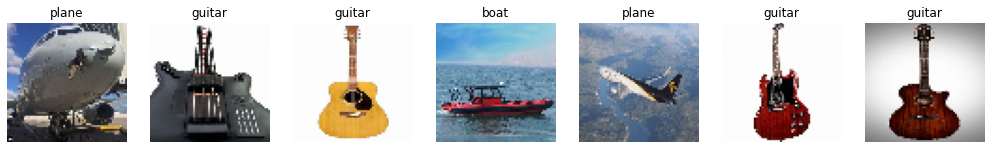


Shuffling test data


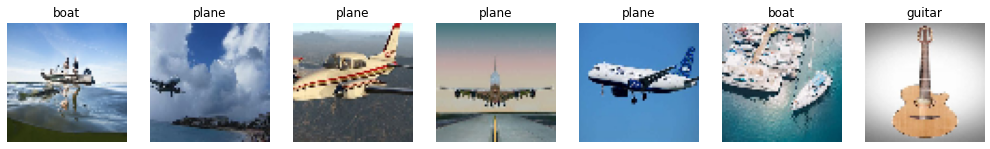

Extracting HOG features from the train dataset...
Extracting HOG features from the test dataset...
Extracting h histogram features from the train dataset...
Extracting h histogram features from the test dataset...
1 : svm_HOG
Creating a Support Vector Machine Model...
Finished training the model.

2 : svm_HHist
Creating a Support Vector Machine Model...
Finished training the model.

3 : svm_raw
Creating a Support Vector Machine Model...
Finished training the model.

4 : nb_HOG
Creating a Gaussian Naive Bayes Model...
Finished training the model.

5 : nb_HHist
Creating a Gaussian Naive Bayes Model...
Finished training the model.

6 : nb_raw
Creating a Gaussian Naive Bayes Model...
Finished training the model.

7 : lreg_HOG
Creating a Logistic Regression Model...
Finished training the model.

8 : lreg_HHist
Creating a Logistic Regression Model...
Finished training the model.

9 : lreg_raw
Creating a Logistic Regression Model...
Finished training the model.



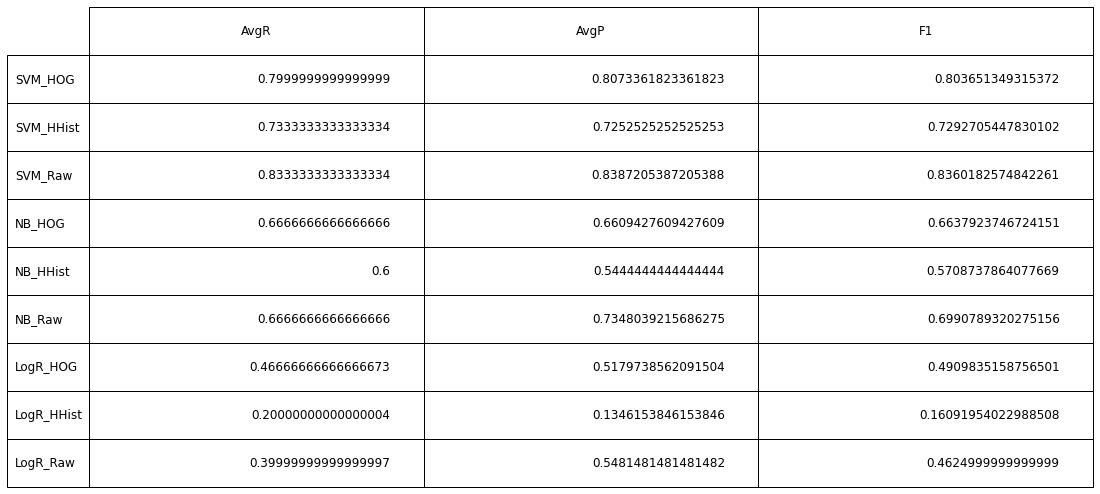

In [ ]:
# The activities described in this cell are worth a maximum of 15 points.

# TO-DO: add the code for the reading, training of models and evaluation processes 
# using your custom dataset.

# check my_data file
if os.path.isfile('my_data.zip'):
  print('File my_data.zip is already uploaded.')
else:
  print('Please upload my_data.zip')
  files.upload()

# check my_data folders
if os.path.isdir('./my_data/train') and os.path.isdir('./my_data/test'):
  print('Folders "./my_data/train" and "./my_data/test" exist.')
else:
  !unzip my_data.zip
  print('Created folders.')

train_folders = "./my_data/train/"
test_folders = "./my_data/test/"
resize_dims = (64, 64)
 
train_data, train_labels, classes_labels = read_data(train_folders, resize_dims)
test_data, test_labels, classes_labels_test = read_data(test_folders, resize_dims) 

# assertion to guarantee that the train and test classes are the same based on the subfolders' names.
assert classes_labels==classes_labels_test, 'Your train/test folder names do not match'

train_data, train_labels = randomize_and_display(train_data, train_labels, classes_labels, display_n=7, phase="train")
test_data, test_labels = randomize_and_display(test_data, test_labels, classes_labels, display_n=7, phase="test")

# features
features = {}

features['HOG_train'] = my_hog_batch(train_data, phase='train')
features['HOG_test'] = my_hog_batch(test_data, phase='test')

# assertions to make sure that the dimensions of your HOG features matrices are correct
assert (features['HOG_test'].shape[0]==test_data.shape[0]) and (features['HOG_train'].shape[0]==train_data.shape[0]), 'Dimensions of HOG features matrix wrong.'

n_bins = 16 

features['HHist_train'] = my_hhist_batch(train_data, n_bins, phase='train')
features['HHist_test'] = my_hhist_batch(test_data, n_bins, phase='test')

# assertions to make sure that the dimensions of your features are correct
assert (features['HHist_train'].shape[0]==train_data.shape[0]) and (features['HHist_test'].shape[0]==test_data.shape[0]), 'Dimensions of HHist features matrix wrong.'
assert (features['HHist_train'].shape[1]==features['HHist_test'].shape[1]==n_bins), 'Dimensions of HHist features matrix wrong.'

features['raw_train'] = np.array([train_data[i].flatten() for i in range(0, train_data.shape[0])])
features['raw_test'] = np.array([test_data[i].flatten() for i in range(0, test_data.shape[0])])

# assertion to make sure that the dimensions of one of the matrices are correct
assert(features['raw_train'].shape[1]==(train_data.shape[1]*train_data.shape[2]*train_data.shape[3])),'Wrong RGB raw values matrix dimensions'

# models
models = {}

model_type = ['svm', 'nb', 'lreg'] #TO-DO (list with three strings specifying the possible model names)
feature_type = ['HOG', 'HHist', 'raw'] #TO-DO (list with three strings specifying the possible feature types)

i = 1
for m in model_type:
    for f in feature_type:
        print(i,':',m+'_'+f)
        models[m+'_'+f] = my_model_trainer(features[f+'_train'], train_labels, model=m)
        i += 1
        print()

# evaluate models
data = np.zeros((9,3)) # only three metrics and nine possible models 
results = {}
idx = 0

for m in model_type:
    for f in feature_type:
        results[m+"_"+f+"_eval"] = my_evaluation(features[f+'_test'], test_labels, models[m+'_'+f])
        data[idx, 0] = results[m+"_"+f+"_eval"]['avg_recall']
        data[idx, 1] = results[m+"_"+f+"_eval"]['avg_precision']
        data[idx, 2] = results[m+"_"+f+"_eval"]['fscore']
        idx += 1

# plot table

row_labels = ['SVM_HOG','SVM_HHist','SVM_Raw','NB_HOG','NB_HHist','NB_Raw','LogR_HOG','LogR_HHist','LogR_Raw']
col_labels = ["AvgR", "AvgP", "F1"]

table = plt.table(cellText=data, rowLabels=row_labels, colLabels=col_labels, loc='center')
table.set_fontsize(12)
table.scale(3,4)
_= plt.axis('off')

**End of the assignment!**